#Decision Tree - Wisconsin Cancer Data

**Source** - Kaggle (https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)

**About the data** - Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number

2) Diagnosis (M = malignant, B = benign)

3-32) Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area -
1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

Usability = 8.53

In [ ]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import sklearn.metrics as metrics

In [ ]:
data = pd.read_csv("drive/My Drive/Colab Notebooks/Cancer_data.csv")

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
data.drop(columns=['id','Unnamed: 32'], inplace=True)

In [ ]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [ ]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
data['diagnosis'].value_counts(normalize=True)*100

B    62.741652
M    37.258348
Name: diagnosis, dtype: float64

In [ ]:
# Any Null entries
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
data.shape

(569, 31)

In [ ]:
data.diagnosis = [1 if i=='M' else 0 for i in data.diagnosis]

In [ ]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Split X and y

X = data.drop(columns=['diagnosis'])
y = data['diagnosis']
print(X.shape, y.shape)

(569, 30) (569,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=42)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape,y_test.shape)

(398, 30) (171, 30) (398,) (171,)


In [ ]:
# Model Building
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [ ]:
# Result and Evaluation

### YOUR CODE HERE ###

print("Decision Tree")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred))

Decision Tree
Accuracy: 0.923977
Precision: 0.857143
Recall: 0.952381
F1 Score: 0.902256


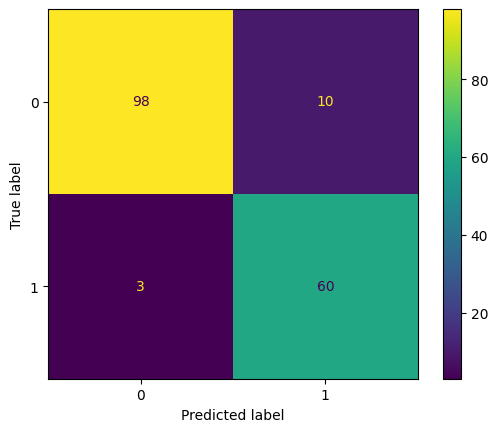

In [ ]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
# Confusion Matrix

cm = metrics.confusion_matrix(y_test, y_pred, labels = dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.class_weight)
disp.plot()

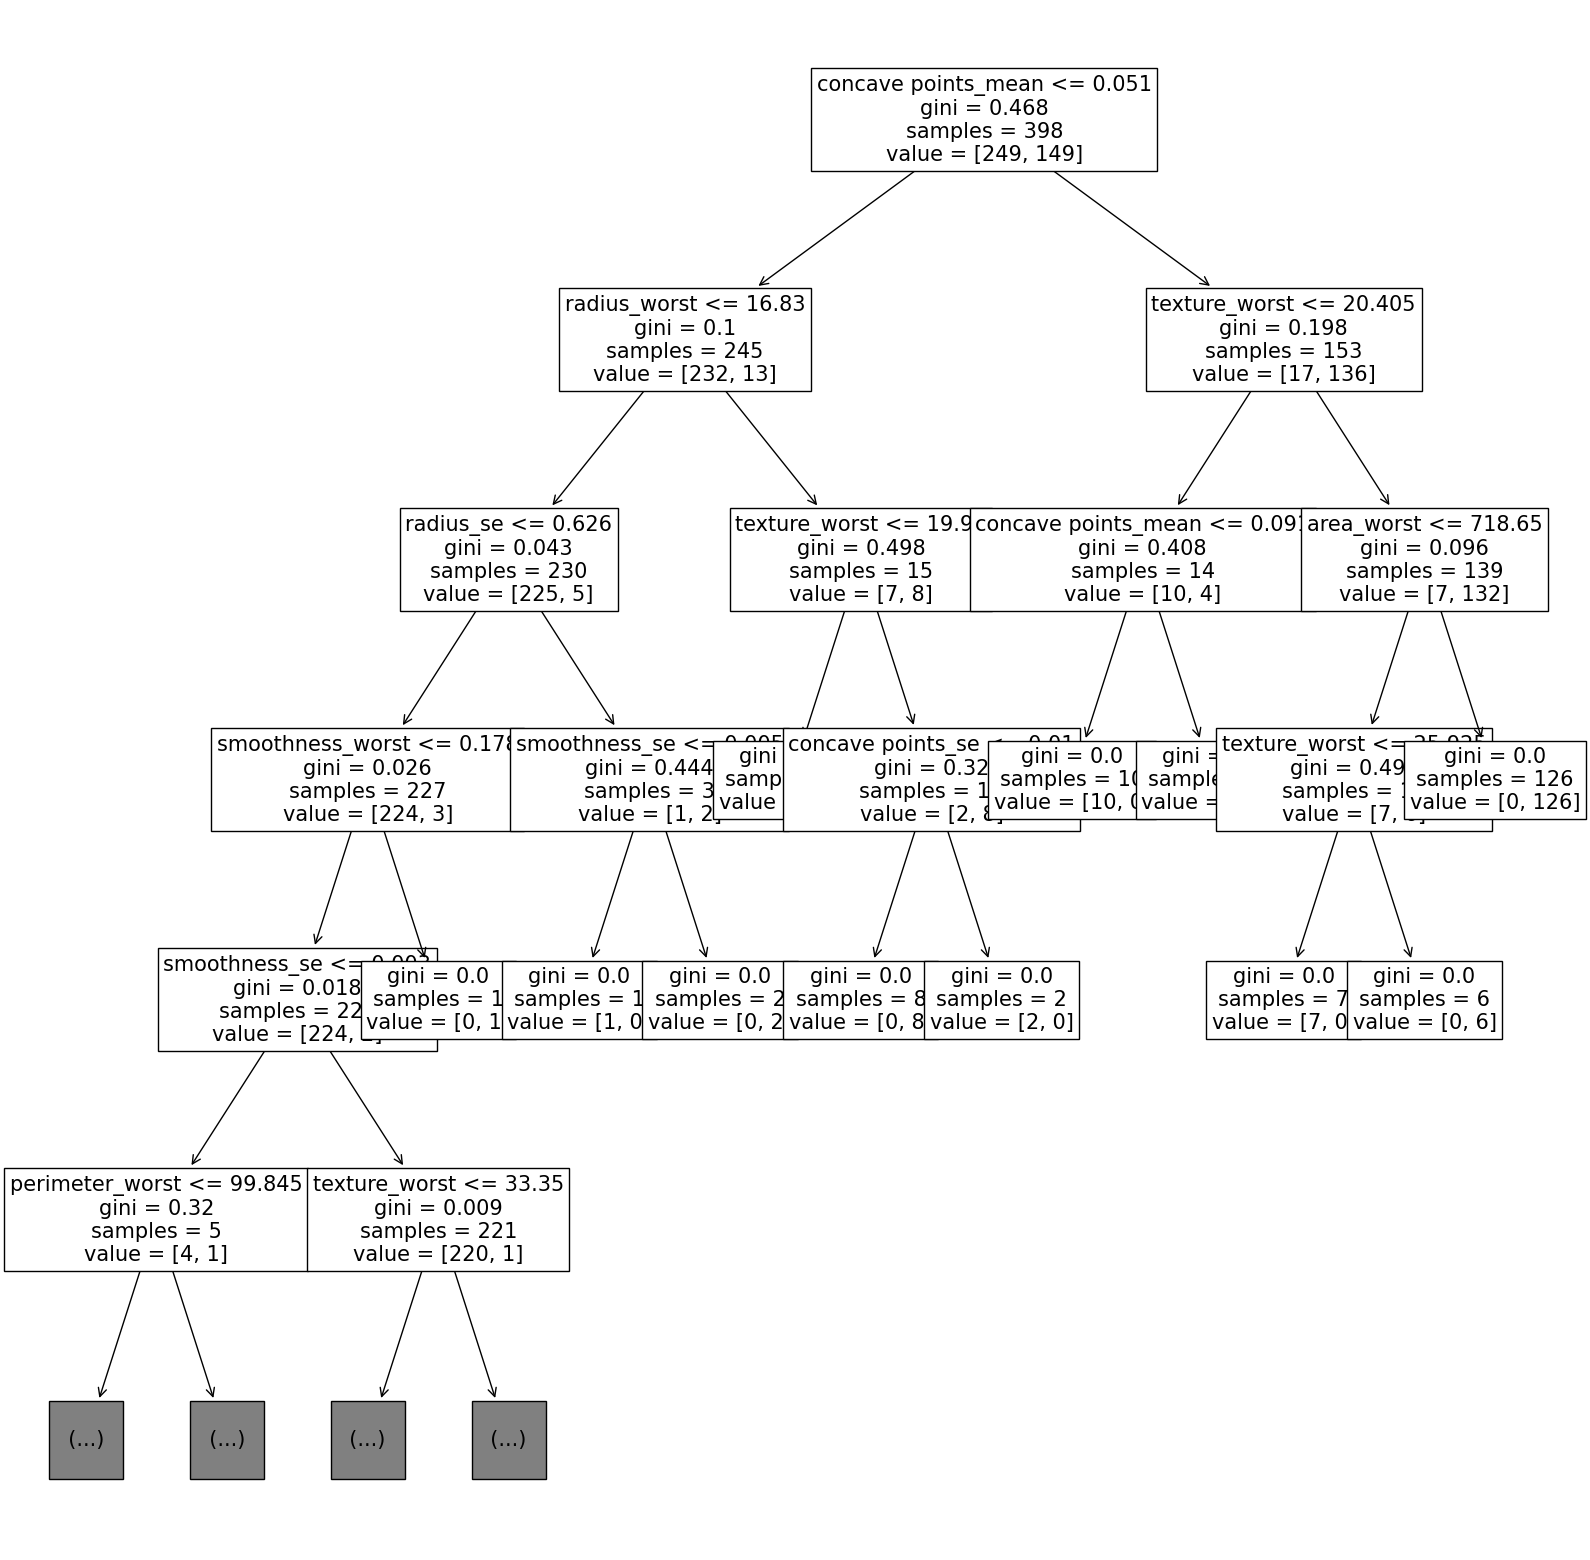

In [ ]:
# Plotting the Decision Tree

plt.figure(figsize=(20,20))
plot_tree(dt, max_depth=5, fontsize=15, feature_names=X.columns)
plt.show()

<Axes: >

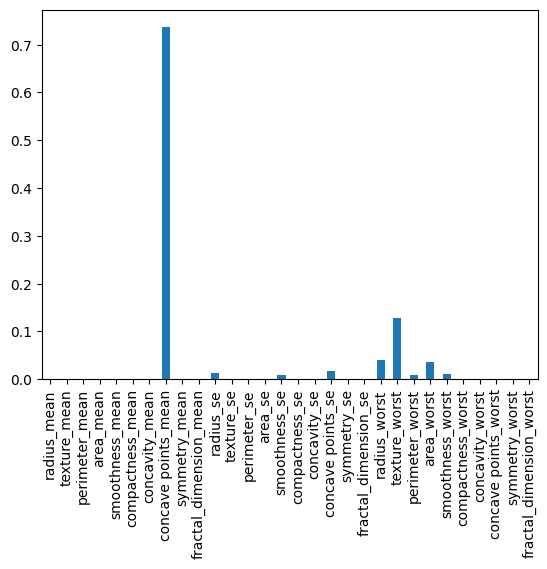

In [ ]:
# Importance Feature graph

importances = dt.feature_importances_

forest_importances = pd.Series(importances, index=X.columns)
fig,ax=plt.subplots()

forest_importances.plot.bar(ax=ax)

In [ ]:
forest_importances.sort_values(ascending=False)

concave points_mean        0.736488
texture_worst              0.128366
radius_worst               0.039537
area_worst                 0.036653
concave points_se          0.017164
radius_se                  0.013563
smoothness_worst           0.010492
smoothness_se              0.009156
perimeter_worst            0.008582
radius_mean                0.000000
symmetry_worst             0.000000
concave points_worst       0.000000
concavity_worst            0.000000
compactness_worst          0.000000
fractal_dimension_se       0.000000
symmetry_se                0.000000
compactness_se             0.000000
concavity_se               0.000000
texture_mean               0.000000
area_se                    0.000000
perimeter_se               0.000000
texture_se                 0.000000
fractal_dimension_mean     0.000000
symmetry_mean              0.000000
concavity_mean             0.000000
compactness_mean           0.000000
smoothness_mean            0.000000
area_mean                  0

The feature importance graph seems to confirm that

**concave points_mean =       0.736488**

**texture_worst        =      0.128366**

**radius_worst          =     0.039537**

**area_worst             =    0.036653**

are the most important features for this model.

In [ ]:
# Hyperparameter Tuning

tree_param = {'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,40,50,100,200]}
scoring = {'accuracy','precision','recall','f1'}

In [ ]:
tuned_dt = DecisionTreeClassifier(random_state=0)

clf = GridSearchCV(tuned_dt,
                   tree_param,
                   scoring=scoring,
                   cv=10,
                   refit='f1')

clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 30, 40,
                                       50, 100, 200]},
             refit='f1', scoring={'precision', 'recall', 'accuracy', 'f1'})

In [ ]:
# COmputing Best Combination of values/ Best hyperparameters

clf.best_estimator_

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
# Determining the best average validation score

print('Best Average Validation Score = ', clf.best_score_)

Best Average Validation Score =  0.8949963755191787


In [ ]:
# Determining the BEST decision tree Model's Accuracy, Precision, Recall, F1 score

results = pd.DataFrame(columns=['Model', 'F1', 'Recall', 'Precision', 'Accuracy'])

def make_results(model_name, model_object):
  """
  Input = Model Name (string) adn fit GrifSearchCV model object
  Returns = a dataframe with best params
  """

  cv_results = pd.DataFrame(model_object.cv_results_)
  best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(),:]

  f1 = best_estimator_results.mean_test_f1
  recall = best_estimator_results.mean_test_recall
  precision = best_estimator_results.mean_test_precision
  accuracy = best_estimator_results.mean_test_accuracy

  table = pd.DataFrame()
  table = table.append({'Model':model_name,
                        'F1':f1,
                        'Recall':recall,
                        'Accuracy':accuracy},
                       ignore_index=True)

  return table

In [ ]:
result_table = make_results("Tuned Decision Tree", clf)
result_table

<ipython-input-46-a1f92f6576cd>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Model':model_name,


,Model,F1,Recall,Accuracy
0,Tuned Decision Tree,0.894996,0.88619,0.922115


In [ ]:
# LEt's plot the Decision Tree witht the best params

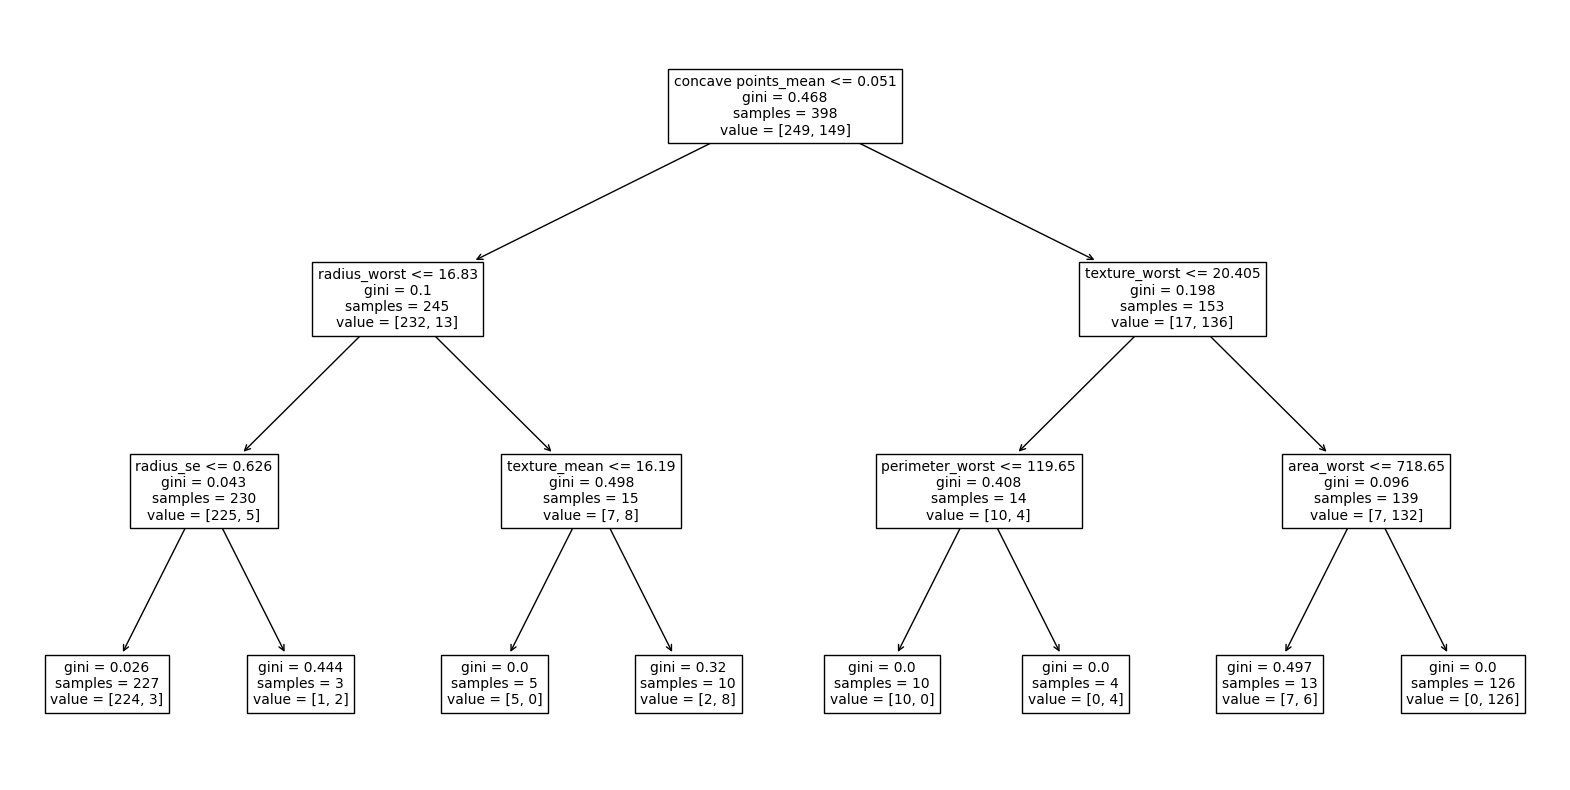

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(clf.best_estimator_, max_depth=5, fontsize=10, feature_names=X.columns);

The plot makes it seem like **_'concave_points_mean', 'radius_worst', and 'texture_worst'_** are among the most important features. The code below outputs a "most important" features graph from the mode

<Axes: >

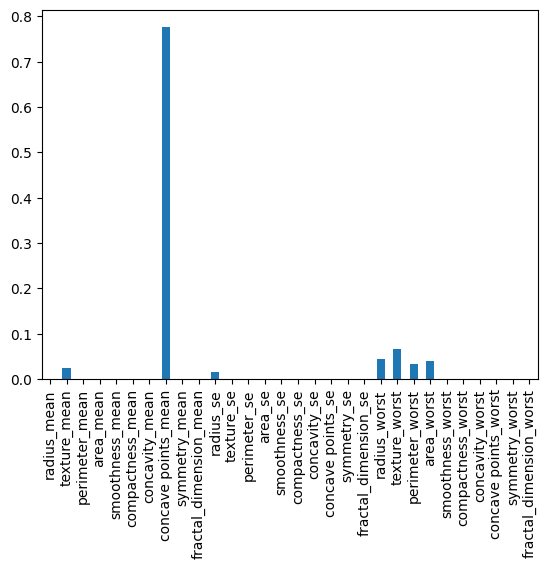

In [ ]:
# Feature importnace for 'clf' model

importances = clf.best_estimator_.feature_importances_

forest_importances = pd.Series(importances, index=X.columns)

fig,ax= plt.subplots()
forest_importances.plot.bar(ax=ax)

In [ ]:
forest_importances.sort_values(ascending=False)

concave points_mean        0.776270
texture_worst              0.066145
radius_worst               0.043482
area_worst                 0.040310
perimeter_worst            0.033708
texture_mean               0.025169
radius_se                  0.014916
radius_mean                0.000000
concave points_se          0.000000
symmetry_worst             0.000000
concave points_worst       0.000000
concavity_worst            0.000000
compactness_worst          0.000000
smoothness_worst           0.000000
fractal_dimension_se       0.000000
symmetry_se                0.000000
compactness_se             0.000000
concavity_se               0.000000
smoothness_se              0.000000
area_se                    0.000000
perimeter_se               0.000000
texture_se                 0.000000
fractal_dimension_mean     0.000000
symmetry_mean              0.000000
concavity_mean             0.000000
compactness_mean           0.000000
smoothness_mean            0.000000
area_mean                  0